In [1]:
import scvelo as scv
import cellrank as cr

In [2]:
adata = scv.read("N1KO0.h5ad")
adata

AnnData object with n_obs × n_vars = 1556 × 36601
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'nCount_RNA', 'nFeature_RNA', 'orig.ident.1', 'nCount_RNA.1', 'nFeature_RNA.1', 'percent.ribo', 'percent.mito', 'count.mad.lower', 'count.mad.higher', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.2', 'seurat_clusters', 'cell_type', 'RNA_snn_res.0.5'
    var: 'features', 'ambiguous_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

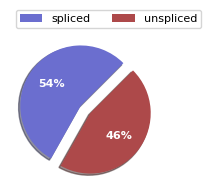

In [3]:
scv.pl.proportions(adata)


In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=20, n_neighbors=30)
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)

Filtered out 26353 genes that are detected 20 counts (shared).
Normalized count data: X, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
recovering dynamics (using 1/40 cores)


  0%|          | 0/43 [00:00<?, ?gene/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:697: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:700: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:09) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


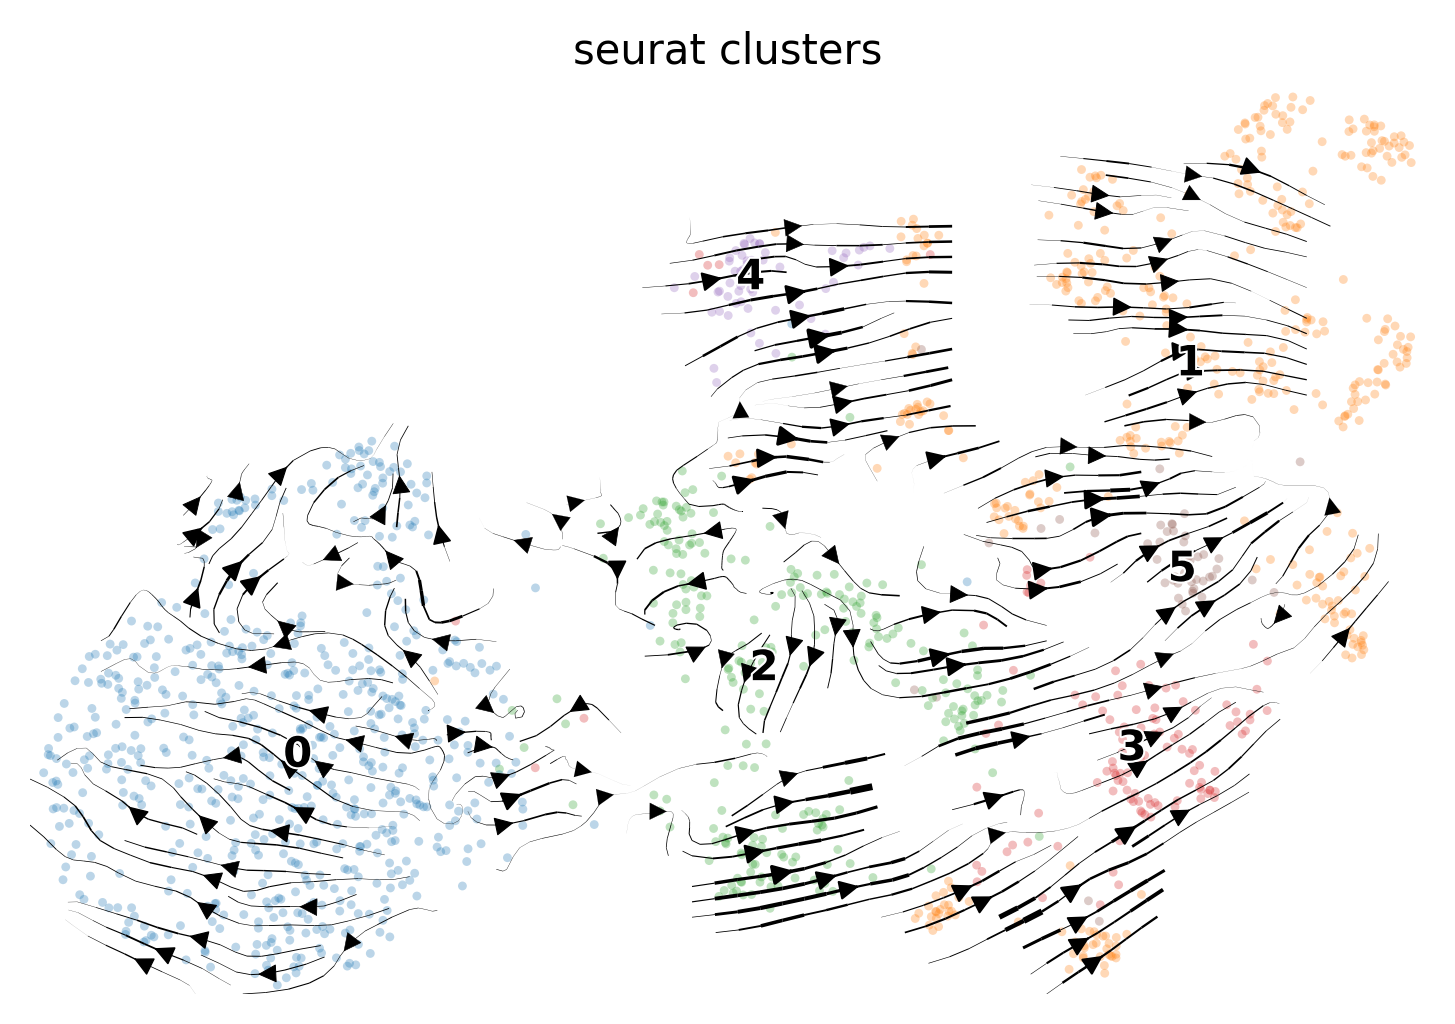

In [5]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=18, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


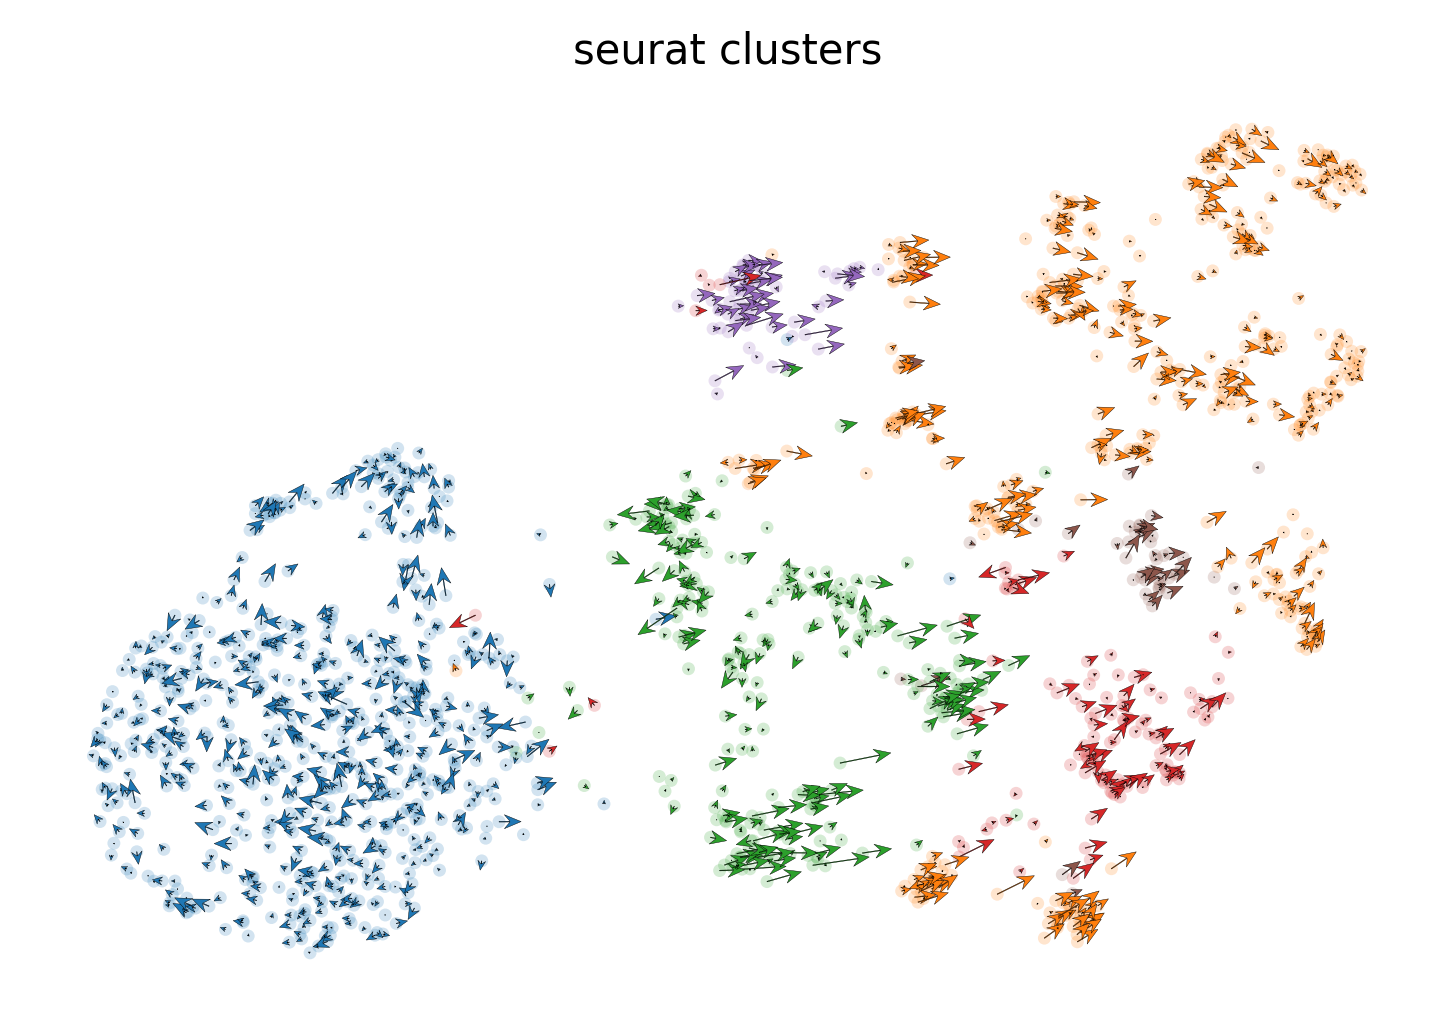

In [6]:
scv.pl.velocity_embedding(adata, basis="umap", color="seurat_clusters", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


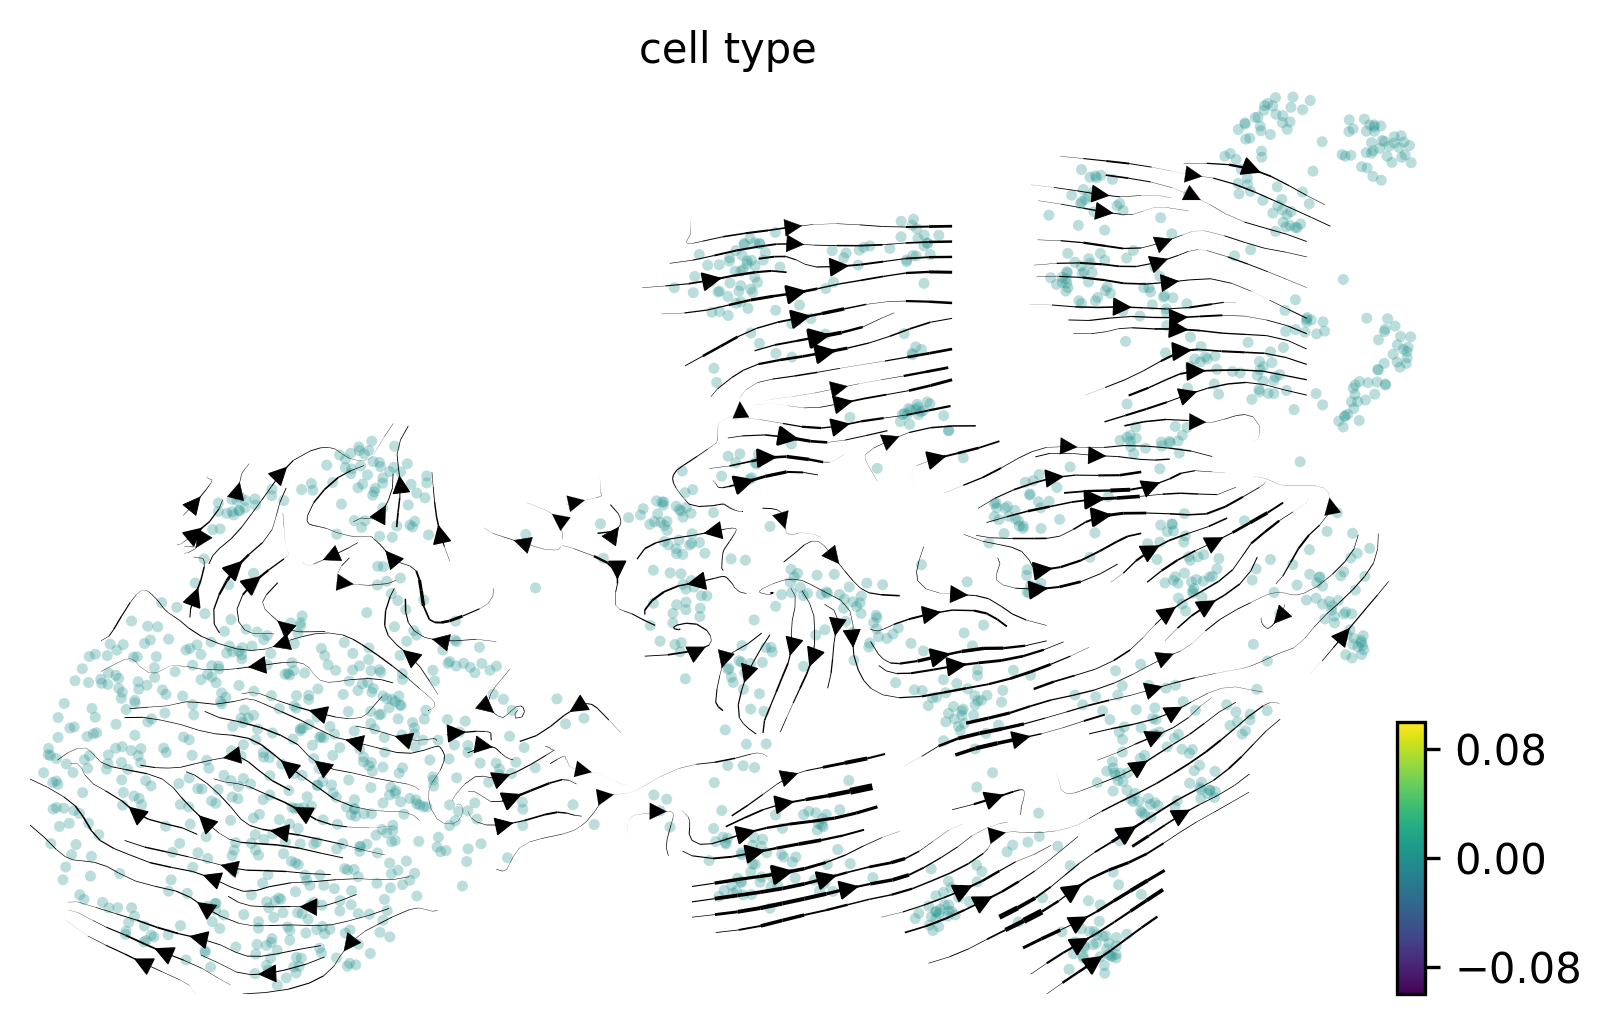

In [7]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


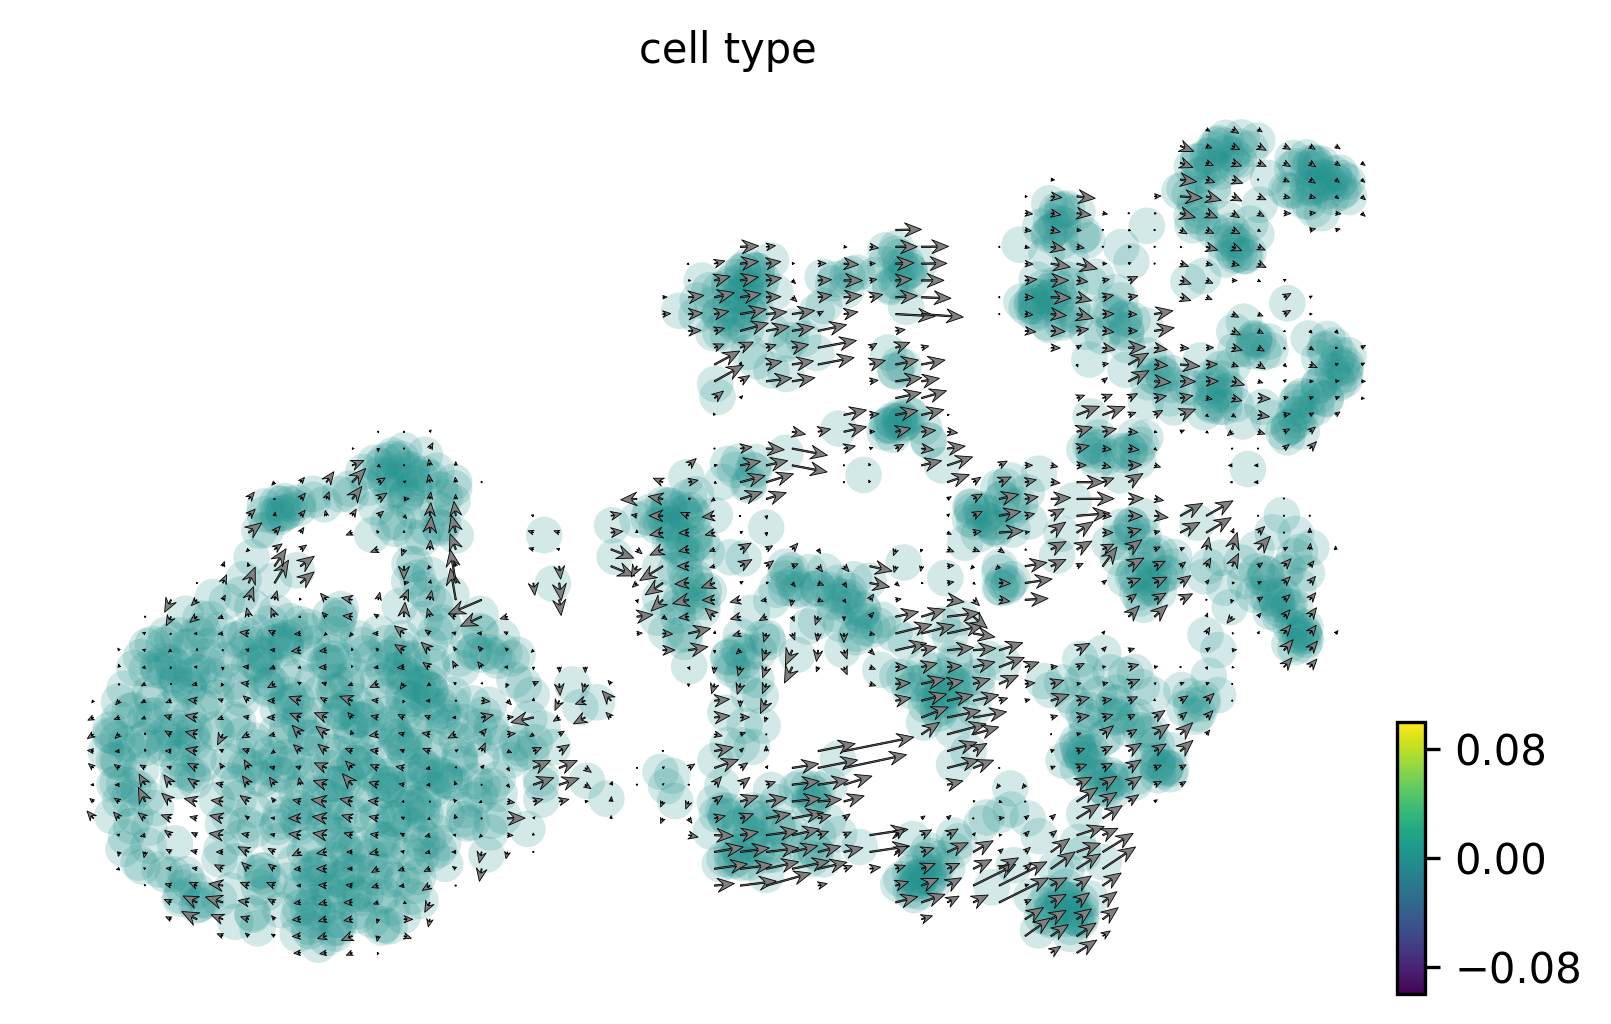

In [8]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


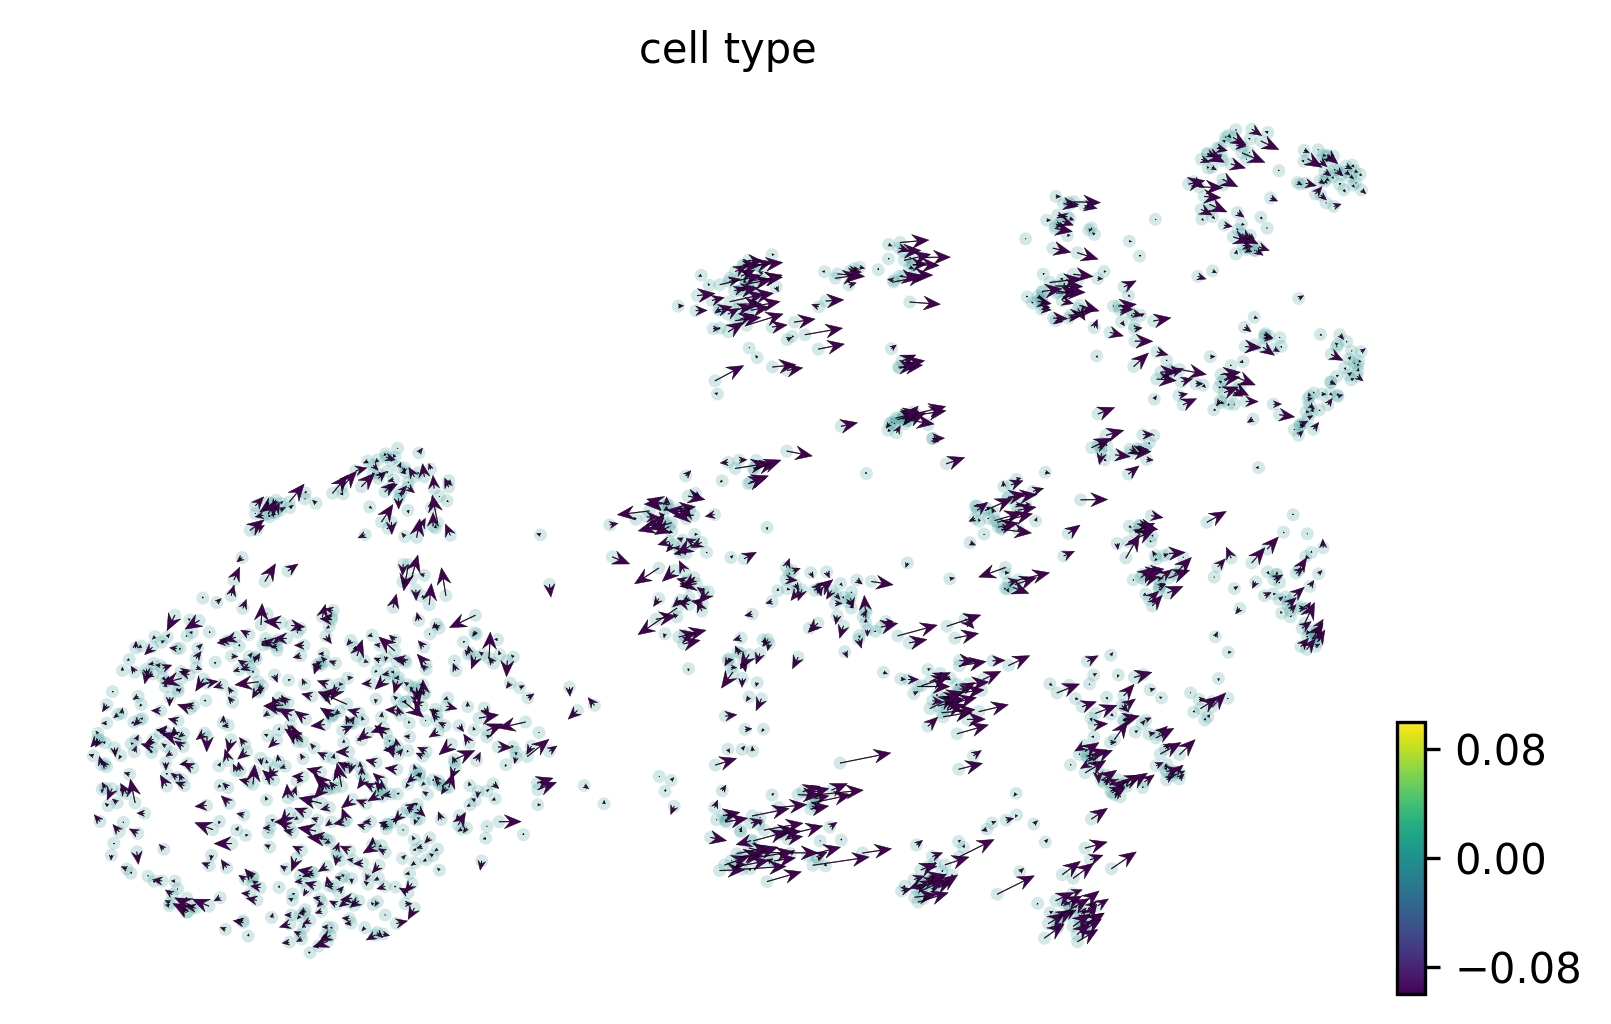

In [9]:
scv.pl.velocity_embedding(adata, basis="umap", color="cell_type", arrow_length=3, arrow_size=2, dpi=300)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


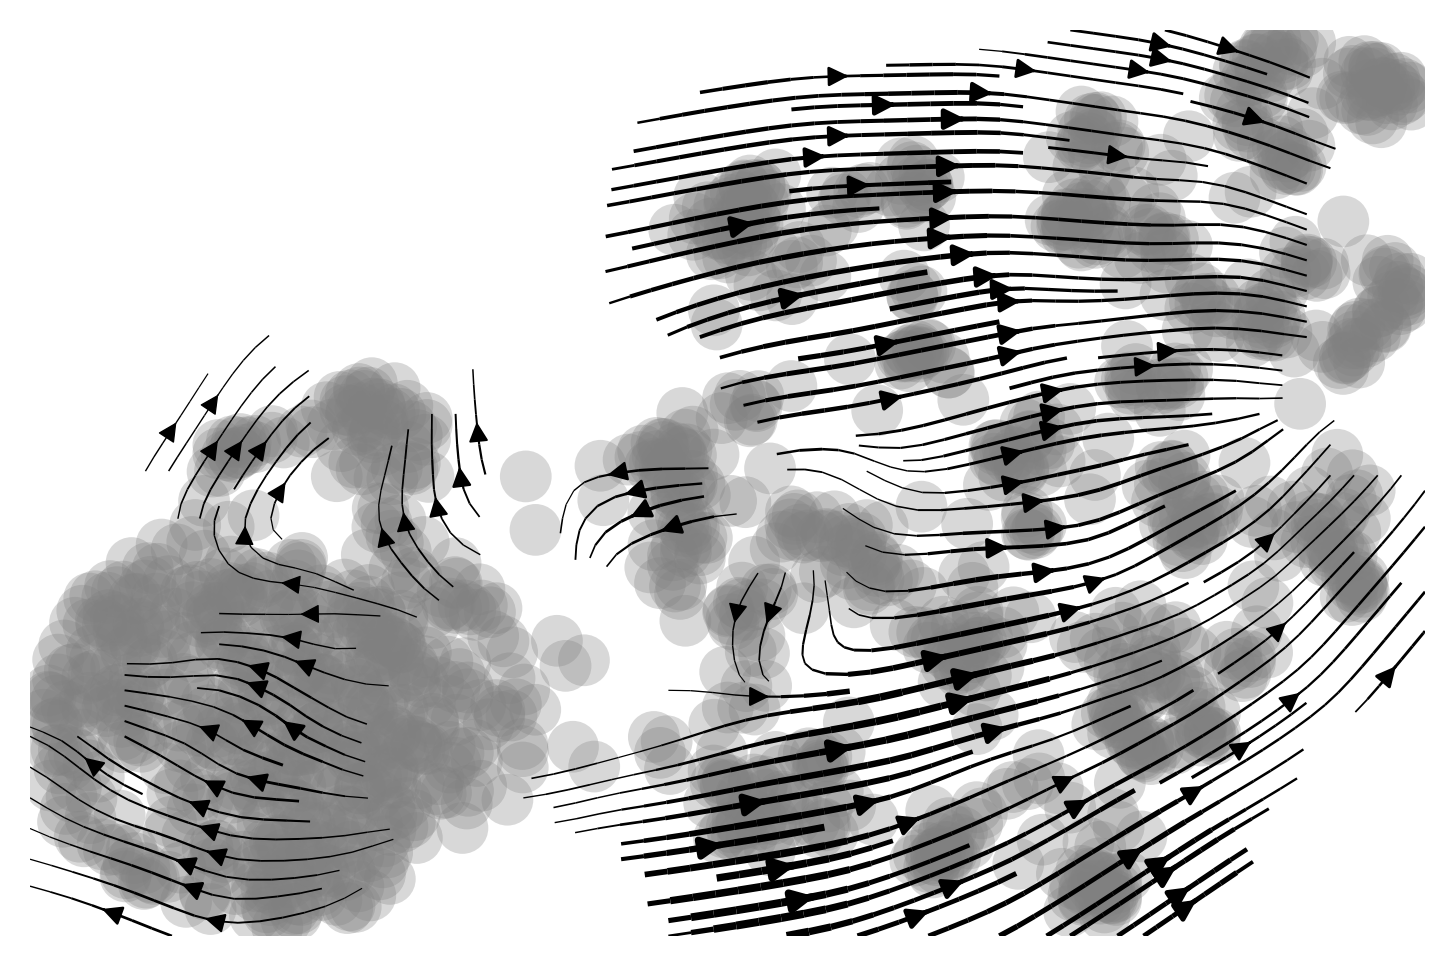

In [10]:
scv.pl.velocity_embedding_stream(
    adata, basis="umap", legend_fontsize=12, title="", smooth=2, min_mass=4, dpi=300
)

### Velocity graph and pseudotime


/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


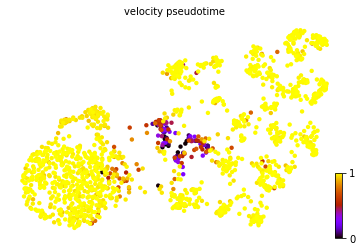

In [11]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

### phase portraits of some marker genes

In [12]:
#scv.pl.velocity(adata, ['PDGFRA'], ncols=1, dpi=300)
#scv.pl.velocity(adata, ['POU5F1'], ncols=1, dpi=300)

### Important genes from velocity

In [14]:
scv.tl.rank_velocity_genes(adata, groupby='seurat_clusters', min_corr=.3)

df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(30)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0           1           2           3           4           5
0      CCDC186         TTN      ANGPT2     CCDC141  AL512283.2         TTN
1       ZNF655     CCDC141  AL355347.1   LINC02141  AC004158.1     CCDC141
2         DLL1   LINC02141  AC004158.1         TTN         TTN   LINC02141
3       POLR3E        ASPM      ZBTB37  AL512283.2   LINC02141   LINC02595
4         RTKN  AL512283.2  AL512283.2        ASPM        ASPM  AL512283.2
5        BCL7B     PHACTR2       BCAT1  AL355347.1       TRIB1        ASPM
6        TRIB1   LINC02595      LRRC8B  AC004158.1      ANGPT2     PHACTR2
7       LRRC8B  AC004158.1       BCL7B       BCAT1     CCDC141       BCAT1
8    LINC02595       BCAT1     PHACTR2      ZBTB37  AL355347.1       BCL7B
9         ASPM       TRIB1       TRIB1     PHACTR2   LINC02595        DLL1
10      ZBTB37  AL355347.1        RTKN      ANGPT2       BCAT1       TRIB1
11     PHACTR2      LRRC8B      POLR3E   LINC02595     PHACTR2        RTKN
12       BCAT1      ANGPT2   LINC02595     CCDC186      ZBTB37     CCDC186
13   LINC02141     CCDC186      ZNF655      LRRC8B      LRRC8B  AC004158.1
14  AC004158.1       BCL7B   LINC02141       BCL7B       BCL7B      ZNF655
15         TTN        RTKN        DLL1      POLR3E     CCDC186      ZBTB37
16     CCDC141      ZBTB37     CCDC141      ZNF655        DLL1      POLR3E
17      ANGPT2        DLL1        ASPM       TRIB1      ZNF655      ANGPT2
18  AL355347.1      ZNF655         TTN        RTKN        RTKN  AL355347.1
19  AL512283.2      POLR3E     CCDC186        DLL1      POLR3E      LRRC8B

In [15]:
#scv.pl.scatter(adata, 'LINC01695', color=['cell_type', 'velocity'])
#scv.pl.velocity(adata, ['LINC01695'], ncols=1, dpi=300)

### Speed and coherence



--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


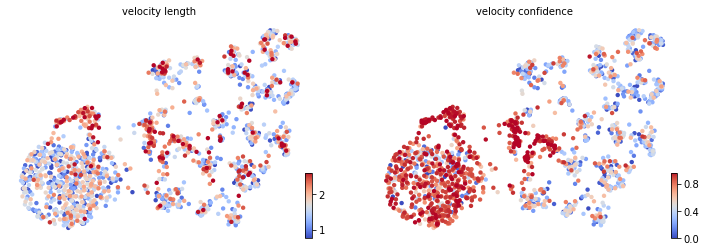

In [16]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

## CellRank

In [17]:
k = cr.tl.transition_matrix(
    adata, weight_connectivities=0.2, softmax_scale=4, show_progress_bar=False
)
cr.tl.terminal_states(adata, cluster_key="seurat_clusters", weight_connectivities=0.2)

### Terminal state

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


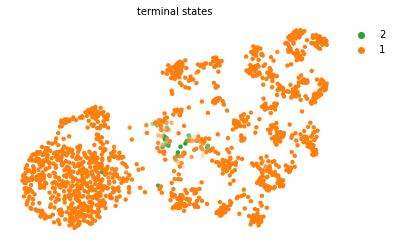

In [18]:
cr.pl.terminal_states(adata)


### Initial state

  0%|          | 0/1556 [00:00<?, ?cell/s]

  0%|          | 0/1556 [00:00<?, ?cell/s]

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


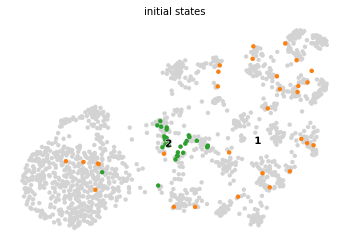

In [19]:
cr.tl.initial_states(adata, cluster_key="seurat_clusters")
cr.pl.initial_states(adata, discrete=True)

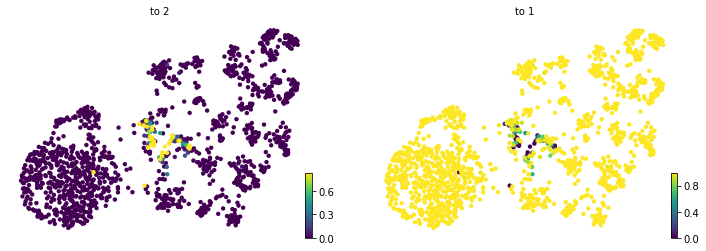

In [20]:
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


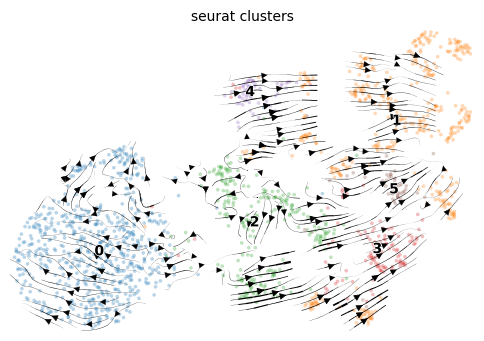

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


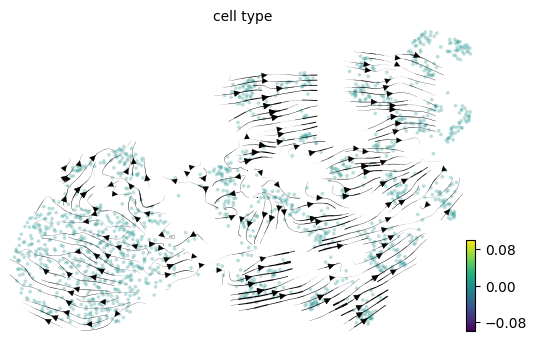

/users/PAS1571/wangcankun100/.local/lib/python3.8/site-packages/scvelo/plotting/utils.py:115: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = pl.figure(None, figsize, dpi=dpi).gca(projection=projection)


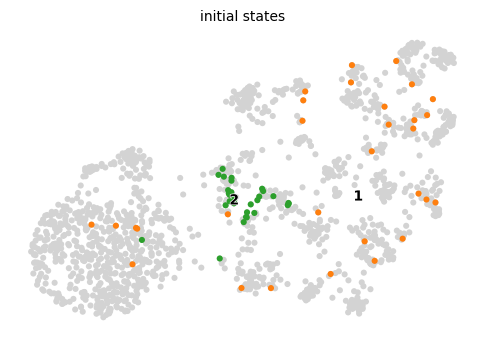

In [21]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="seurat_clusters",size=28, dpi=100)
scv.pl.velocity_embedding_stream(adata, basis="umap", color="cell_type",size=28, dpi=100)
cr.pl.initial_states(adata, discrete=True, dpi=100)